#***Carlos Gross-Martinez***
#***CAP 6635 - Artificial Intelligence***


#***Question 8***
# Informed Search
# code credit: Adapted from following github project with revision
# https://gist.github.com/Nicholas-Swift/003e1932ef2804bebef2710527008f44

In [ ]:
#importing libraries
import random
import numpy as np

#declaring and initializing the node class
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):               #<-- added a hash method
        return hash(self.position)

# method ='AStar', 'GBF', 'UCS'
# 'AStar': A-star search, 'GBF': greedy best first, 'UCS': uniform cost search
def InformedSearch(maze, start, end, method='Astar'):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = set()                # <-- closed_list must be a set

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    expanded_nodes=0
    queue_size=0
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.add(current_node)     # <-- change append to add

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return(expanded_nodes,queue_size,path[::-1]) # Return reversed path

        # update expanded nodes, and update maximum queuze size
        expanded_nodes=expanded_nodes+1
        if(len(open_list)>queue_size):
            queue_size=len(open_list)  # check maximum queue size

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if child in closed_list:              # <-- remove inner loop so continue takes you to the end of the outer loop
                continue

            # Create the f, g, and h values
            child.g = current_node.g + np.sqrt(np.square(child.position[0] - current_node.position[0])+np.square(child.position[1] - current_node.position[1]))
            child.h = np.sqrt(np.square(child.position[0] - end_node.position[0])+np.square(child.position[1] - end_node.position[1]))
            if method=='AStar':
                child.f = child.g + child.h
            elif method=='GBF':
                child.f=child.h
            elif method=='UCS':
                child.f=child.g


            # Child is already in the open list
            childAlreadyExist=False
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    childAlreadyExist=True
                    break

            # Add the child to the open list if Chinld not in the open list
            if(not childAlreadyExist):
                open_list.append(child)

#function that calculates path length
def pathLength(path):
    dis=0
    for i in range(len(path)-1):
        x1=path[i][0]
        y1=path[i][1]
        x2=path[i+1][0]
        y2=path[i+1][1]
        dis=dis+np.sqrt(np.square(x1-x2)+np.square(y1-y2))
    return(dis)

In [ ]:
# searchMethod: 'AStar' or 'GBF' or 'UCS'
def mazeRunner(start,end,maze,searchMethod='AStar'):
    #force start and end positions to be reachable.
    maze[start[0]][start[1]]=0
    maze[end[0]][end[1]]=0
    expanded_nodes,queue_size,path = InformedSearch(maze, start, end, searchMethod)  # 'AStar' or 'GBF' or 'UCS'
    print("\r\n%s search path length: %f"%(searchMethod,pathLength(path)))
    return(expanded_nodes,queue_size,path)

#declaring Maze
maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

#setting start and end nodes
start = (0, 0)
end = (9, 9)

#Calling the different algorithms and printing Fringe, Visited, and final Path
print(mazeRunner(start,end,maze,'AStar'))
print(mazeRunner(start,end,maze,'GBF'))
print(mazeRunner(start,end,maze,'UCS'))


AStar search path length: 14.485281
(669, 685, [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 9), (7, 9), (8, 9), (9, 9)])

GBF search path length: 15.313708
(13, 29, [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (6, 7), (5, 8), (6, 9), (7, 9), (8, 9), (9, 9)])

UCS search path length: 14.485281
(1363, 429, [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 9), (8, 9), (9, 9)])


#***Answer to 8a***
# Game field, start, and end positions were updated as instructed. Based on the results it can be concluded that the 3 methods reached the goal states by visiting 13 nodes. However, the A* and UCS methods found the paths in the expense of a lot of memory since their fringes and visited nodes queues were extreamly large in comparison to GBF. With this in mind, it can be concluded that GBF in this situation was the most optimal method since it found the proper path by using the least amount of mememory because it had the smallest queue sizes for the fringe and visited nodes.
#***Answer to 8b***
#Based on the run from the algorithms, it can be noted that A* found the optimal path which arrived at the goal state most efficiently and optimally.
#***Answer to 8c***
#Based on the run from the algorithms, it can be noted that GBF has the lowest number of nodes in the fringe as well as visited to arrive at the goal node.

#***Question 9***
# Local search (Hill Climbing and Simulated Annealing to solve N-Queens problem)
# code credit: Adapted from following github project with revision
# https://github.com/TranDatDT/n-queens-simulated-annealing/blob/master/main.py

Failed
Failed
Failed
Failed
Failed
Failed
Successful Solution:
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0]
It takes 7 repetitions to succeed. Runtime in second 0.504371:


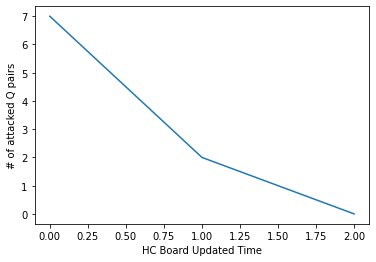

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 8
TEMPERATURE = 40


def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2


def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board


def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing():
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

def simulated_annealing():
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)


def print_chess_board(board):
    '''Print the chess board'''
    showBoard = np.zeros([N_QUEENS,N_QUEENS],dtype = int)
    for column, row in board.items():
        showBoard[row][column]=1
        #print("{} => {}".format(column, row))
    for i in range(N_QUEENS):
        print(showBoard[i])

def main(method='HC'):
    start = time.time()
    Success=False
    repetitions=0
    while not Success:
        if method=='SA':
            Success,Costs=simulated_annealing()
            repetitions=repetitions+1
        elif method=='HC':
            Success,Costs=hill_climbing()
            repetitions=repetitions+1
    print("It takes %d repetitions to succeed. Runtime in second %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)

if __name__ == "__main__":
  method='HC'
  Success,Costs=main(method)  # HC: hill_climbing or SA: Simulated annealing
  plt.plot(Costs)
  plt.xlabel(method+' Board Updated Time')
  plt.ylabel('# of attacked Q pairs')

#***Answer to 9a - HC Search AVG Runtime and Sucess Rate***

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

TEMPERATURE = 40

def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2

def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board

def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing(N_QUEENS):
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break

    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

#creating list with all queen sizes
queen_sizes = [8, 16, 32, 64]

#loop that traverses through all queen sizes
for queen in queen_sizes:

  #variable declaration and initialization
  queen_number = int(queen)
  runtimes = []
  success_rates = []

  #loop that will iterate 10 times through each queen size
  for i in range (0, 10):

    #variable declaration and initialization
    start = time.time()
    Success=False
    repetitions=0

    #looping through algorithm until a solution is found
    while not Success:
      Success,Costs=hill_climbing(queen_number)
      repetitions=repetitions+1

    #appending the sucess rate for current iteration to list
    success_rates.append(1 / repetitions)

    #appending runtime for current iteration to list
    runtimes.append(time.time()- start)

  #calculating average run time from 10 iterations with current N
  avg_runtime_total = sum(runtimes) / len(runtimes)

  #calculating success rate from 10 iterations with current N
  avg_success_rate = sum(success_rates) / len(success_rates)

  #printing results to for current N to screen
  print('For N = ' + str(queen_number))
  print('The average runtime after 10 iterations is: ' + str(avg_runtime_total))
  print('The average success rate after 10 iterations is: ' + str(avg_success_rate))
  print('--------------------------------------------\n')

For N = 8
The average runtime after 10 iterations is: 0.287455415725708
The average success rate after 10 iterations is: 0.43095238095238103
--------------------------------------------

For N = 16
The average runtime after 10 iterations is: 0.5508458614349365
The average success rate after 10 iterations is: 0.4825396825396826
--------------------------------------------

For N = 32
The average runtime after 10 iterations is: 1.6707529783248902
The average success rate after 10 iterations is: 0.3292063492063492
--------------------------------------------

For N = 64
The average runtime after 10 iterations is: 5.777563881874085
The average success rate after 10 iterations is: 0.2458177820677821
--------------------------------------------



#***Answer to 9a - SA Search AVG Runtime and Sucess Rate***

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

TEMPERATURE = 40

def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2

def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board

def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def simulated_annealing(N_QUEENS):
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

#creating list with all queen sizes
queen_sizes = [8, 16, 32, 64]

#loop that traverses through all queen sizes
for queen in queen_sizes:

  #variable declaration and initialization
  queen_number = int(queen)
  runtimes = []
  success_rates = []

  #loop that will iterate 10 times through each queen size
  for i in range (0, 10):

    #variable declaration and initialization
    start = time.time()
    Success=False
    repetitions=0

    #looping through algorithm until a solution is found
    while not Success:
      Success,Costs=simulated_annealing(queen_number)
      repetitions=repetitions+1

    #appending the sucess rate for current iteration to list
    success_rates.append(1 / repetitions)

    #appending runtime for current iteration to list
    runtimes.append(time.time()- start)

  #calculating average run time from 10 iterations with current N
  avg_runtime_total = sum(runtimes) / len(runtimes)

  #calculating success rate from 10 iterations with current N
  avg_success_rate = sum(success_rates) / len(success_rates)

  #printing results to for current N to screen
  print('For N = ' + str(queen_number))
  print('The average runtime after 10 iterations is: ' + str(avg_runtime_total))
  print('The average success rate after 10 iterations is: ' + str(avg_success_rate))
  print('--------------------------------------------\n')

For N = 8
The average runtime after 10 iterations is: 0.03587493896484375
The average success rate after 10 iterations is: 0.9
--------------------------------------------

For N = 16
The average runtime after 10 iterations is: 0.1184497594833374
The average success rate after 10 iterations is: 0.9
--------------------------------------------

For N = 32
The average runtime after 10 iterations is: 0.34181511402130127
The average success rate after 10 iterations is: 0.8833333333333334
--------------------------------------------

For N = 64
The average runtime after 10 iterations is: 8.364853310585023
The average success rate after 10 iterations is: 0.17588552449965494
--------------------------------------------



#***Answer to 9a - Analysis***
#From the results of running the code for HC and SA, it can be noted a trend. The trend is that for HC search, the runtime values were higher in most of the results. The only time when HC had a lower runtime than SA was when N = 64. In all other values for N, SA had a lower runtime value than HC. Therefore, it can be concluded that SA has a faster runtime with lower values of N in comparison to SA  
#This trend also carried in the same way for success rates of HC and SA where for HC the sucess rate values were lower in most of the results. The only time when HC had a higher sucess rate than SA was when N = 64. In all other values for N, SA had a higher success rate value than HC

#***Answer to 9b***
#Graph of HC

It takes 6 repetitions to succeed. Runtime in second 0.401501:


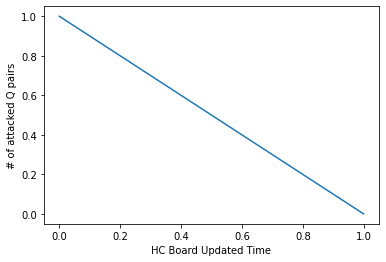

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 8
TEMPERATURE = 40


def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2


def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board


def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing():
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

def simulated_annealing():
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)


def print_chess_board(board):
    '''Print the chess board'''
    showBoard = np.zeros([N_QUEENS,N_QUEENS],dtype = int)
    for column, row in board.items():
        showBoard[row][column]=1
        #print("{} => {}".format(column, row))
    for i in range(N_QUEENS):
        print(showBoard[i])

def main(method='HC'):
    start = time.time()
    Success=False
    repetitions=0
    while not Success:
        if method=='SA':
            Success,Costs=simulated_annealing()
            repetitions=repetitions+1
        elif method=='HC':
            Success,Costs=hill_climbing()
            repetitions=repetitions+1
    print("It takes %d repetitions to succeed. Runtime in second %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)

if __name__ == "__main__":
  method='HC'
  Success,Costs=main(method)  # HC: hill_climbing or SA: Simulated annealing
  plt.plot(Costs)
  plt.xlabel(method+' Board Updated Time')
  plt.ylabel('# of attacked Q pairs')

#***Answer to 9b***
#Graph of SA

It takes 1 repetitions to succeed. Runtime in second 0.011133:


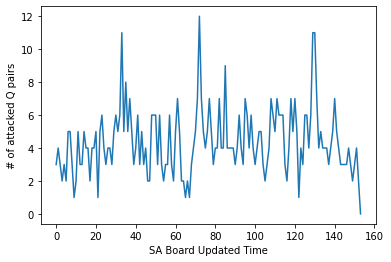

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 8
TEMPERATURE = 40


def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2


def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board


def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing():
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

def simulated_annealing():
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)


def print_chess_board(board):
    '''Print the chess board'''
    showBoard = np.zeros([N_QUEENS,N_QUEENS],dtype = int)
    for column, row in board.items():
        showBoard[row][column]=1
        #print("{} => {}".format(column, row))
    for i in range(N_QUEENS):
        print(showBoard[i])

def main(method='HC'):
    start = time.time()
    Success=False
    repetitions=0
    while not Success:
        if method=='SA':
            Success,Costs=simulated_annealing()
            repetitions=repetitions+1
        elif method=='HC':
            Success,Costs=hill_climbing()
            repetitions=repetitions+1
    print("It takes %d repetitions to succeed. Runtime in second %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)

if __name__ == "__main__":
  method='SA'
  Success,Costs=main(method)  # HC: hill_climbing or SA: Simulated annealing
  plt.plot(Costs)
  plt.xlabel(method+' Board Updated Time')
  plt.ylabel('# of attacked Q pairs')

#***Answer to 9b***
#Analysis
#SA graph is going up and down because when it gets to a point where it cannot find the valid answer, then it will randomly reset the placement of the queens in a new board and start from scratch. On the other hand, HC does not ramdomly start from scratch but it backtracks to the next node of possible states. This is why SA plot is going up and down while RN is monotonically decreasing

#***Answer to 9c***

In [ ]:
import random
import numpy as np
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 64

def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2

def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board

def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def simulated_annealing(TEMPERATURE):
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)

    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.0000001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens

        delta = cost(successor) - cost_answer
        if delta < 0 or (random.uniform(0, 1) < exp(-delta / t)):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            #print("Successful Solution:")
            #print_chess_board(answer)
            break
    if solution_found is False:
        #print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

#creating list with all queen sizes
temperatures = [4000, 400, 40, 4, 0.4]

#loop that traverses through all queen sizes
for temp in temperatures:

  #variable declaration and initialization
  new_temp = int(temp)
  runtimes = []
  success_rates = []

  #variable declaration and initialization
  start = time.time()
  Success=False
  repetitions=0

  #looping through algorithm until a solution is found
  while not Success:
    Success,Costs=simulated_annealing(new_temp)
    repetitions=repetitions+1

  #appending the sucess rate for current iteration to list
  success_rates.append(1 / repetitions)

  #appending runtime for current iteration to list
  runtimes.append(time.time()- start)

  #printing results to for current N to screen
  print('For Temperature = ' + str(new_temp))
  print('The runtime is: ' + str(runtimes))
  print('The success rate is: ' + str(success_rates))
  print('--------------------------------------------\n')

For Temperature = 4000
The runtime is: [31.770310640335083]
The success rate is: [0.07142857142857142]
--------------------------------------------

For Temperature = 400
The runtime is: [2.0701215267181396]
The success rate is: [0.3333333333333333]
--------------------------------------------

For Temperature = 40
The runtime is: [8.972668170928955]
The success rate is: [0.07692307692307693]
--------------------------------------------

For Temperature = 4
The runtime is: [19.017159700393677]
The success rate is: [0.02702702702702703]
--------------------------------------------



#***Answer to 9d***
#From running the algorithm at different temperatures, it can be noted that as the temperature decreases, the runtime decreases as well while success rate increases. Important to note that this is not true for the last tempeature value 0.4. While running the algorithm when temperature was set to 0.4, the session timed out after 7 hours without attaining the solution. I believe that 0.4 is to small and the algorithm is taking very small steps to reach the global maxima not allowing to reach a result in a feasible time.

# I believe this is because SA is a more developed version of HC. Since AS has a probability of choosing a not very optimal move, it has a higher probability of finding the global maxima. On the other hand, HC checks if its current state has the best cost on his neighbor or not. Therefore, it could get stuck in the local maxima.

#***Question 10***
# Local search (Genetic Algorithm to solve N-Queens problem)
# code credit: Adapted from following github project with revision
# https://github.com/waqqasiq/n-queen-problem-using-genetic-algorithm/blob/master/N-Queen_GeneticAlgo.py

In [ ]:
import random

#geneating random chromosomes
def random_chromosome(size):
    return [ random.randint(1, nq) for _ in range(nq) ]

#fitness function, calculating number of queen pairs not attacking each other.
def fitness(chromosome):
    horizontal_collisions = sum([chromosome.count(queen)-1 for queen in chromosome])/2
    diagonal_collisions = 0

    n = len(chromosome)
    left_diagonal = [0] * 2*n
    right_diagonal = [0] * 2*n
    for i in range(n):
        left_diagonal[i + chromosome[i] - 1] += 1
        right_diagonal[len(chromosome) - i + chromosome[i] - 2] += 1

    diagonal_collisions = 0
    for i in range(2*n-1):
        counter = 0
        if left_diagonal[i] > 1:
            counter += left_diagonal[i]-1
        if right_diagonal[i] > 1:
            counter += right_diagonal[i]-1
        diagonal_collisions += counter / (n-abs(i-n+1))

    return int(maxFitness - (horizontal_collisions + diagonal_collisions)) #28-(2+3)=23

def probability(chromosome, fitness):
    return fitness(chromosome) / maxFitness

def random_pick(population, probabilities):
    populationWithProbabilty = zip(population, probabilities)
    total = sum(w for c, w in populationWithProbabilty)
    r = random.uniform(0, total)
    upto = 0
    for c, w in zip(population, probabilities):
        if upto + w >= r:
            return c
        upto += w
    assert False, "Shouldn't get here"

def reproduce(x, y): #doing cross_over between two chromosomes
    n = len(x)
    c = random.randint(0, n - 1)
    return x[0:c] + y[c:n]

def mutate(x):  #randomly changing the value of a random index of a chromosome
    n = len(x)
    c = random.randint(0, n - 1)
    m = random.randint(1, n)
    x[c] = m
    return x

def genetic_queen(population, fitness):
    mutation_probability = 0.05
    new_population = []
    probabilities = [probability(n, fitness) for n in population]
    for i in range(len(population)):
        x = random_pick(population, probabilities) #best chromosome 1
        y = random_pick(population, probabilities) #best chromosome 2
        child = reproduce(x, y) #creating two new chromosomes from the best 2 chromosomes
        if random.random() < mutation_probability:
            child = mutate(child)
        print_chromosome(child)
        new_population.append(child)
        if fitness(child) == maxFitness: break
    return new_population

def print_chromosome(chrom):
    print("Chromosome = {},  Fitness = {}"
        .format(str(chrom), fitness(chrom)))

if __name__ == "__main__":
    nq = int(input("Enter Number of Queens: ")) #say N = 8
    maxFitness = (nq*(nq-1))/2  # 8*7/2 = 28
    population = [random_chromosome(nq) for _ in range(100)]
    print("Maximum fitness = {}" .format(str(maxFitness)))

    generation = 1

    while not maxFitness in [fitness(chrom) for chrom in population]:
        print("=== Generation {} ===".format(generation))
        population = genetic_queen(population, fitness)
        print("")
        print("Maximum Fitness = {}".format(max([fitness(n) for n in population])))
        generation += 1
    chrom_out = []
    print("Solved in Generation {}!".format(generation-1))
    for chrom in population:
        if fitness(chrom) == maxFitness:
            print("");
            print("One of the solutions: ")
            chrom_out = chrom
            print_chromosome(chrom)

    board = []

    for x in range(nq):
        board.append(["x"] * nq)

    for i in range(nq):
        board[nq-chrom_out[i]][i]="Q"


    def print_board(board):
        for row in board:
            print (" ".join(row))

    print()
    print_board(board)

Streaming output truncated to the last 5000 lines.
Chromosome = [7, 4, 2, 8, 3, 5, 6, 1],  Fitness = 27
Chromosome = [5, 4, 2, 8, 3, 6, 3, 3],  Fitness = 24
Chromosome = [5, 4, 2, 8, 3, 2, 6, 1],  Fitness = 26
Chromosome = [7, 4, 2, 8, 3, 5, 2, 3],  Fitness = 25

Maximum Fitness = 27
=== Generation 8133 ===
Chromosome = [5, 4, 2, 8, 3, 6, 3, 1],  Fitness = 26
Chromosome = [7, 2, 2, 8, 3, 6, 6, 1],  Fitness = 25
Chromosome = [7, 4, 2, 8, 5, 6, 8, 1],  Fitness = 26
Chromosome = [1, 4, 2, 8, 3, 6, 3, 1],  Fitness = 25
Chromosome = [6, 4, 2, 8, 3, 5, 3, 1],  Fitness = 26
Chromosome = [7, 4, 2, 8, 3, 6, 3, 1],  Fitness = 26
Chromosome = [7, 4, 2, 1, 3, 2, 6, 1],  Fitness = 25
Chromosome = [7, 4, 2, 8, 3, 5, 6, 1],  Fitness = 27
Chromosome = [7, 2, 2, 4, 3, 5, 8, 1],  Fitness = 26
Chromosome = [1, 4, 2, 8, 3, 2, 6, 1],  Fitness = 25
Chromosome = [6, 4, 2, 8, 3, 6, 3, 1],  Fitness = 25
Chromosome = [5, 4, 2, 8, 3, 6, 6, 1],  Fitness = 26
Chromosome = [7, 5, 2, 8, 5, 5, 6, 1],  Fitness = 24
Ch

#***Answer to 10a***
#From the results of running the 8 Queen search using the HC and GA algorithms, it can be noted that HC was able to find a solutions with 0.5 seconds after 7 repetions. On the other hand, the GA method had to run for one hour before achieving a solution. This is because, the HC method only takes the next state if the next state is better than the current one. If this process fails it starts all over again trying. On the other hand, GA works in the mixing and crossing of "Cromosomes". Therefore, it does not reflect on wheather or not, the mix will lead to a better solution. This causes GA to conduct the mixing of two cromosomes even if the cromosomes that is mixing are optimal. This is why the GA needs to continue to mix cromosomes until it finds a solution. On top of that it ramdomly mutates elements in the chromosome array which could be damaging as this mutation can replace values that are actually nominal reverting the progress that it made. This ends up in the GA having to iterate more and take longer to complete when compared with HC.

#***Answer to 10b***
#In order to avoid this conflict, it is possible to stablish some conditions prior to making the mutation instead of having the GA make this mutation randomly. One of conditions could be that it will only mutate the elements which have the same number in the list. Another one will be to ensure to make a mutation of the repeated row to any row that is missing. I believe that instead of having the mutation happen randonly, if we can manipulate it to address known issues, then it will greatly improve the performance of how to find better solutions when conducting the permutation.
#On the other hand, in order to address the crossover issue, I believe that we can implement some type of check that determines if the offsprings have a higher or lower fitness scores. If the fitness score is lower in the offspring, then it will try the next pairing option. Also, we can try to only mix chromosomes with the highest fitness score instead of randomly selecting them and trying all possible permutations before trying the next chromosome. This might take a little longer it will ensure that that we are always selecting the highest fitness score between the mix of two chomosomes gratly reducing the number of generations